In [182]:
%matplotlib inline
import os
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
#from astroML.plotting import setup_text_plots
#import pdb
#setup_text_plots(fontsize=25, usetex=True)

mpl.rc('font',family='Times New Roman')
mpl.rcParams['font.size'] = 15.0
mpl.rc('text', usetex=False)

In [2]:
import colorpy

In [3]:
import colorpy.colormodels

In [4]:
import colorpy.plots

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [7]:
data = np.genfromtxt("spectra/earth_quadrature_radiance_refl.dat", skip_header=8)
earth_wl = data[:,0] * 1000.0 # Convert microns to nm
earth_I = data[:,1]
earth_Sun = data[:,2]
earth_R = data[:,3]

In [8]:
earthmask = (earth_wl > 350) & (earth_wl < 750)

In [11]:
earth = np.vstack([earth_wl[earthmask], earth_R[earthmask]]).T
earth.shape

(15238, 2)

Saving plot test.pdf


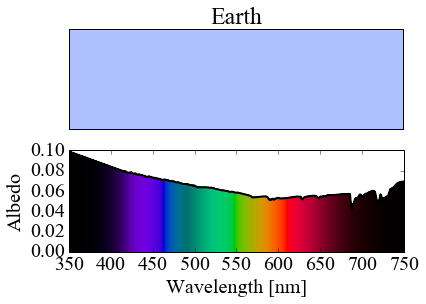

In [15]:
colorpy.plots.spectrum_plot(earth, "Earth", "test.pdf", xlabel="Wavelength [nm]", ylabel="Albedo")

In [19]:
data = np.genfromtxt("spectra/Mars_geo_albedo.txt")
mars_wl = data[:,0] * 1000.0 # Convert microns to nm
mars_A = data[:,1]
marsmask = (mars_wl > 350) & (mars_wl < 700)
mars = np.vstack([mars_wl[marsmask], mars_A[marsmask]]).T

Saving plot mars.pdf


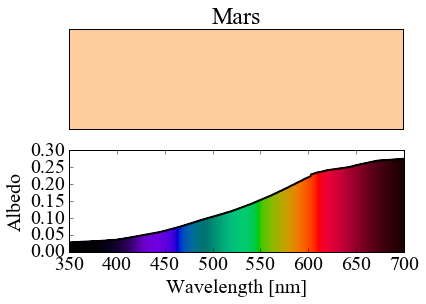

In [20]:
colorpy.plots.spectrum_plot(mars, "Mars", "mars.pdf", xlabel="Wavelength [nm]", ylabel="Albedo")

In [23]:
data = np.genfromtxt("spectra/grass.alb", skip_header=26)
wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)
grass = np.vstack([wl[mask], A[mask]]).T

Saving plot grass.pdf


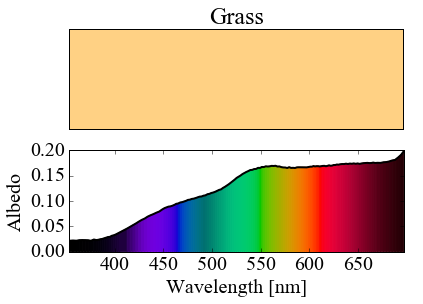

In [24]:
colorpy.plots.spectrum_plot(grass, "Grass", "grass.pdf", xlabel="Wavelength [nm]", ylabel="Albedo")

Saving plot snow.pdf


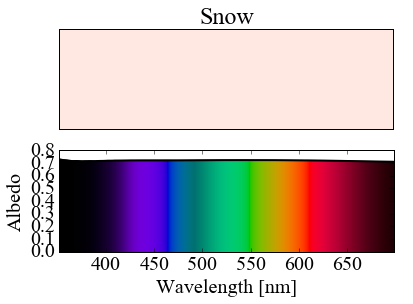

In [26]:
data = np.genfromtxt("spectra/snow.alb", skip_header=26)
wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)
snow = np.vstack([wl[mask], A[mask]]).T
colorpy.plots.spectrum_plot(snow, "Snow", "snow.pdf", xlabel="Wavelength [nm]", ylabel="Albedo")

Saving plot redalgae.pdf


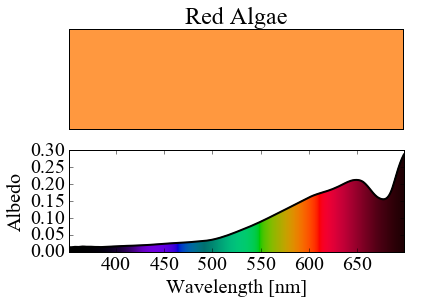

In [27]:
data = np.genfromtxt("spectra/red_algae.alb", skip_header=16)
wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)
redalg = np.vstack([wl[mask], A[mask]]).T
colorpy.plots.spectrum_plot(redalg, "Red Algae", "redalgae.pdf", xlabel="Wavelength [nm]", ylabel="Albedo")

Saving plot conifers.pdf


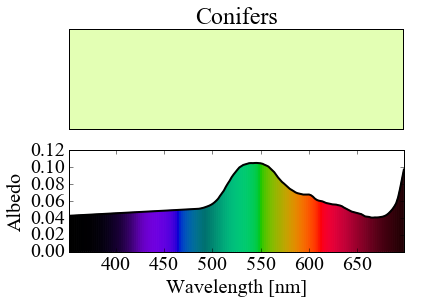

In [28]:
data = np.genfromtxt("spectra/conifers.alb", skip_header=26)
wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)
conifers = np.vstack([wl[mask], A[mask]]).T
colorpy.plots.spectrum_plot(conifers, "Conifers", "conifers.pdf", xlabel="Wavelength [nm]", ylabel="Albedo")

Saving plot ocean.pdf


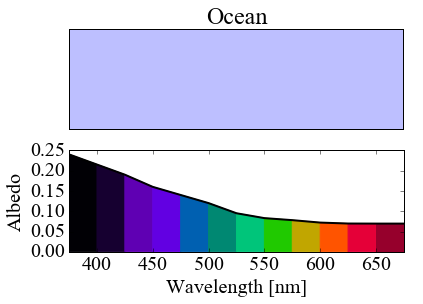

In [29]:
data = np.genfromtxt("spectra/ocean.alb", skip_header=26)
wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)
ocean = np.vstack([wl[mask], A[mask]]).T
colorpy.plots.spectrum_plot(ocean, "Ocean", "ocean.pdf", xlabel="Wavelength [nm]", ylabel="Albedo")

Saving plot sun.pdf


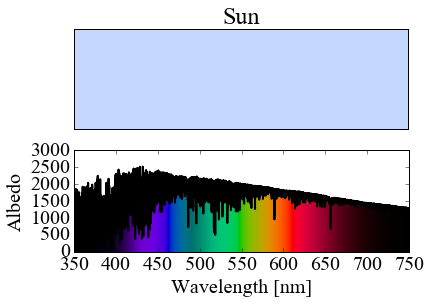

In [30]:
sun = np.vstack([earth_wl[earthmask], earth_Sun[earthmask]]).T
colorpy.plots.spectrum_plot(sun, "Sun", "sun.pdf", xlabel="Wavelength [nm]", ylabel="Albedo")

## Multiply Albedo by Solar Spectrum

Saving plot grass2.pdf


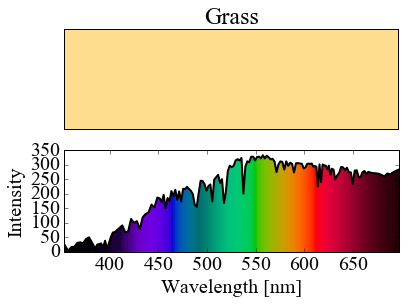

In [32]:
data = np.genfromtxt("spectra/grass.alb", skip_header=26)

wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)

# Interpolate sun to wl grid
F_solar = np.interp(wl, earth_wl, earth_Sun)
# Multiply Albedo and Flux
I = A * F_solar

grass = np.vstack([wl[mask], I[mask]]).T
colorpy.plots.spectrum_plot(grass, "Grass", "grass2.pdf", xlabel="Wavelength [nm]", ylabel="Intensity")

Saving plot snow2.pdf


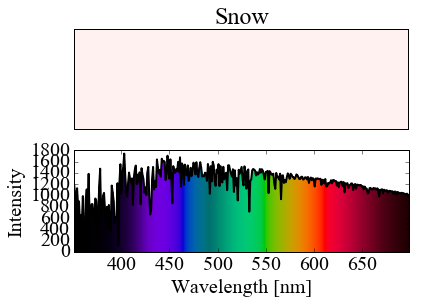

In [33]:
data = np.genfromtxt("spectra/snow.alb", skip_header=26)

wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)

# Interpolate sun to wl grid
F_solar = np.interp(wl, earth_wl, earth_Sun)
# Multiply Albedo and Flux
I = A * F_solar

snow = np.vstack([wl[mask], I[mask]]).T
colorpy.plots.spectrum_plot(snow, "Snow", "snow2.pdf", xlabel="Wavelength [nm]", ylabel="Intensity")

Saving plot mars2.pdf


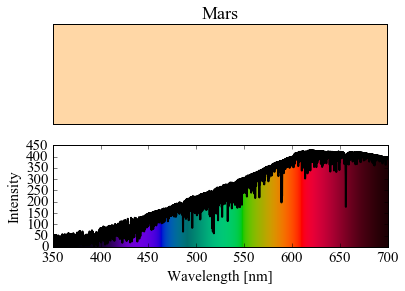

In [38]:
data = np.genfromtxt("spectra/Mars_geo_albedo.txt")

wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)

# Interpolate sun to wl grid
F_solar = np.interp(wl, earth_wl, earth_Sun)
# Multiply Albedo and Flux
I = A * F_solar

mars = np.vstack([wl[mask], I[mask]]).T
colorpy.plots.spectrum_plot(mars, "Mars", "mars2.pdf", xlabel="Wavelength [nm]", ylabel="Intensity")

Saving plot redalgae2.pdf


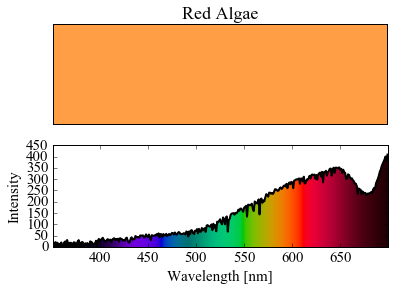

In [37]:
data = np.genfromtxt("spectra/red_algae.alb", skip_header=16)

wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)

# Interpolate sun to wl grid
F_solar = np.interp(wl, earth_wl, earth_Sun)
# Multiply Albedo and Flux
I = A * F_solar

redalgae = np.vstack([wl[mask], I[mask]]).T
colorpy.plots.spectrum_plot(redalgae, "Red Algae", "redalgae2.pdf", xlabel="Wavelength [nm]", ylabel="Intensity")

## Making my own plots

In [48]:
def color_rectangle(**kwargs):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    rect = plt.Rectangle((0.0, 0.0), 1, 1, **kwargs)
    ax.add_patch(rect)
    plt.axis('off')

In [1]:
from colorpy import colormodels, ciexyz

In [46]:
color_string = colormodels.irgb_string_from_rgb (
    colormodels.rgb_from_xyz (ciexyz.xyz_from_spectrum (earth)))

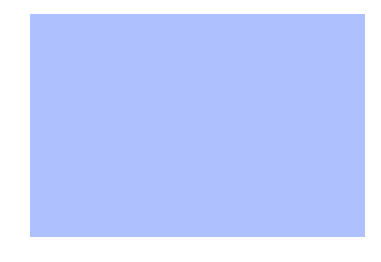

In [49]:
color_rectangle(color=color_string, alpha=1.0)

In [51]:
xyz_from_wavelength = np.vectorize(ciexyz.xyz_from_wavelength)

In [52]:
rgb_from_xyz = np.vectorize(colormodels.rgb_from_xyz)

In [61]:
xyz = ciexyz.xyz_from_wavelength(wl[0])
rgb_colors = colormodels.rgb_from_xyz(xyz)

In [98]:
from jakely.plot import set_figure_colors

In [114]:
def plot_response(ax=None, wlmin=350, wlmax=750, **kwargs):
    
    data = np.genfromtxt("eye_response_functions/ciexyz31_1.csv", delimiter=',')
    wl = data[:,0]
    mask = (wl >= wlmin) & (wl <= wlmax)
    wl = wl[mask]
    x = data[mask,1]
    y = data[mask,2]
    z = data[mask,3]
    
    
    yscale = 1.0
    
    # Create new axis if not specified, otherwise add twinx to current figure
    if ax is None:
        fig = plt.figure(figsize=(12,8))
        gs = gridspec.GridSpec(1,1) 
        ax = plt.subplot(gs[0])
    else:
        ax = ax.twinx()
        ax.set_ylim([0.0,10.0])
        ax.axes.get_yaxis().set_visible(False)          
    
    # Plot response functions
    ax.plot(wl,x, color='white', label=r'x', alpha=1, lw=2.0)
    ax.plot(wl,y, color='white', label=r'y', alpha=1, lw=2.0)
    ax.plot(wl,z, color='white', label=r'z', alpha=1, lw=2.0)
    
    # Add legend
    #leg = ax.legend(loc=0)
    #leg.get_frame().set_alpha(0.0)
    
    #ax.set_ylabel("Response Function")

In [184]:
mpl.rc('font',family='Times New Roman')
mpl.rcParams['font.size'] = 20.0

def rgb_from_wavelength(wl): 
    # get rgb colors for each wavelength
    num_wl = len(wl)
    rgb_colors = np.empty ((num_wl, 3))
    for i in range (0, num_wl):
        wl_nm = wl[i]
        xyz = ciexyz.xyz_from_wavelength (wl_nm)
        rgb_colors [i] = colormodels.rgb_from_xyz (xyz)
    # scale to make brightest rgb value = 1.0
    rgb_max = np.max (rgb_colors)
    scaling = 1.0 / rgb_max
    rgb_colors *= scaling
    return rgb_colors

def plot_spectrum(wl, spectrum, 
                  wlmin=350, wlmax=750, 
                  stellar_spec=None, 
                  show_cie=False,
                  xtitle="Wavelength [nm]", 
                  ytitle="Intensity", 
                  title="", 
                  **kwargs):   
    
    if np.min(wl) > wlmin: wlmin = np.min(wl)
    if np.max(wl) < wlmax: wlmax = np.max(wl)
    
    # Mask wl region
    mask = (wl >= wlmin) & (wl <= wlmax)
    wl = wl[mask]
    spectrum = spectrum[mask]
    
    # Read-in solar spectrum
    if stellar_spec is None:
        pass
    elif stellar_spec == "Sun":             
        data = np.genfromtxt("spectra/earth_quadrature_radiance_refl.dat", skip_header=8)
        wl_solar = data[:,0] * 1000.0 # Convert microns to nm
        F_solar = data[:,2]
        # Interpolate sun to CMF
        F_solar = np.interp(wl, wl_solar, F_solar)
        # Multiply Albedo and Flux
        spectrum = spectrum * F_solar
    else:
        print("Given stellar_spec is not included.")
    
    # Plot spectrum
    fig = plt.figure(figsize=(12,8))
    gs = gridspec.GridSpec(1,1) 
    ax1 = plt.subplot(gs[0])
    ax1.set_xlim([wlmin, wlmax])
    
    num_wl = len(wl)
    
    #
    rgb_colors = rgb_from_wavelength(wl)
    
    #
    spec = np.vstack([wl, spectrum]).T
    rgb_eye = colormodels.irgb_string_from_rgb (
        colormodels.rgb_from_xyz (ciexyz.xyz_from_spectrum (spec)))
    
    # draw color patches (thin vertical lines matching the spectrum curve) in color
    for i in range (0, num_wl-1):    # skipping the last one here to stay in range
        x0 = wl [i]
        x1 = wl [i+1]
        y0 = spectrum [i]
        y1 = spectrum [i+1]
        poly_x = [x0,  x1,  x1, x0]
        poly_y = [0.0, 0.0, y1, y0]
        color_string = colormodels.irgb_string_from_rgb (rgb_colors[i])
        ax1.fill (poly_x, poly_y, color_string, edgecolor=color_string)
    
    # plot intensity as a curve
    ax1.plot (
        wl, spectrum,
        color='k', linewidth=2.0, antialiased=True)
    
    # plot CIE response curves
    if show_cie:
        plot_response(ax=ax1, wlmin=wlmin, wlmax=wlmax)
    
    ax1.set_xlabel(xtitle)
    ax1.set_ylabel(ytitle)
    ax1.set_title(title)
                            
    # Set plot background color to derived rgb color
    set_figure_colors(fig, foreground="white", background="black")
    ax1.patch.set_facecolor(rgb_eye)

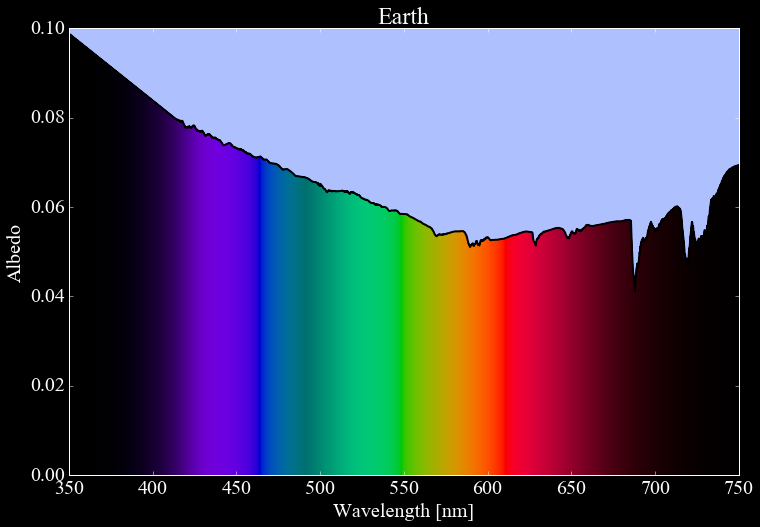

In [281]:
plot_spectrum(earth_wl, earth_R, title="Earth", show_cie=False, ytitle="Albedo")

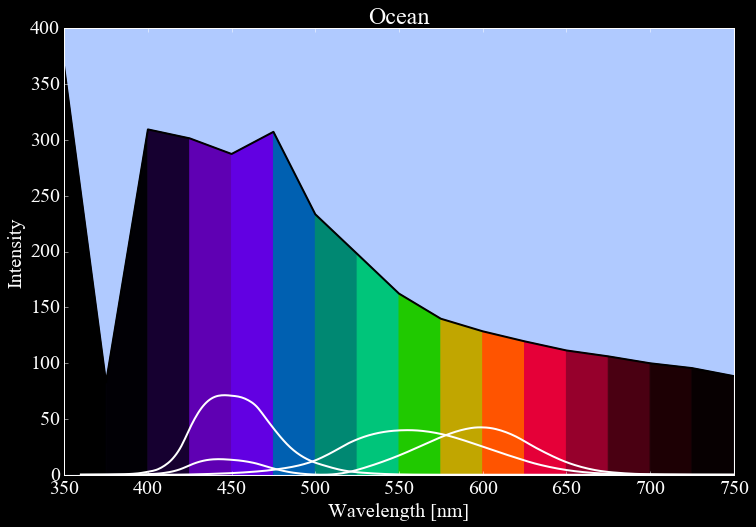

In [276]:
data = np.genfromtxt("spectra/ocean.alb", skip_header=26)
wl = data[:,0] * 1000.0
dwl = wl[1:] - wl[:-1]
dwl = np.hstack([dwl, dwl[-1]])
A = data[:,1]# * dwl * 1e-5
plot_spectrum(wl, A, title="Ocean", stellar_spec="Sun", show_cie=True)

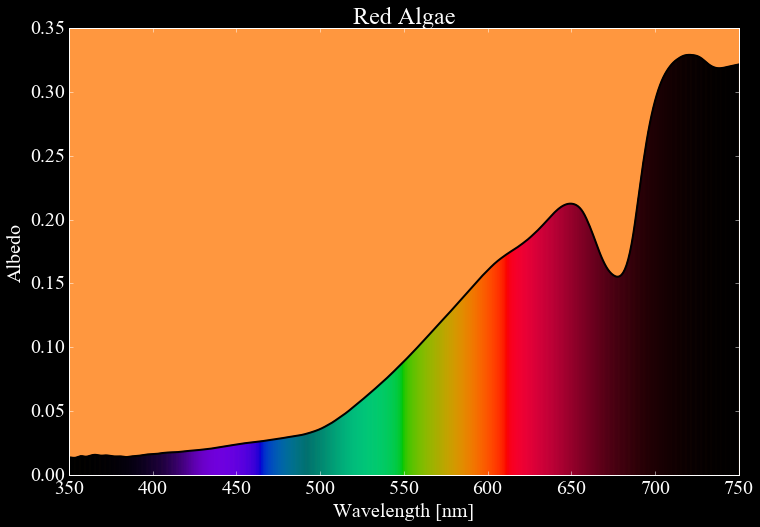

In [150]:
data = np.genfromtxt("spectra/red_algae.alb", skip_header=16)
wl = data[:,0] * 1000.0
A = data[:,1]
plot_spectrum(wl, A, title="Red Algae", stellar_spec=None, show_cie=False, ytitle="Albedo")

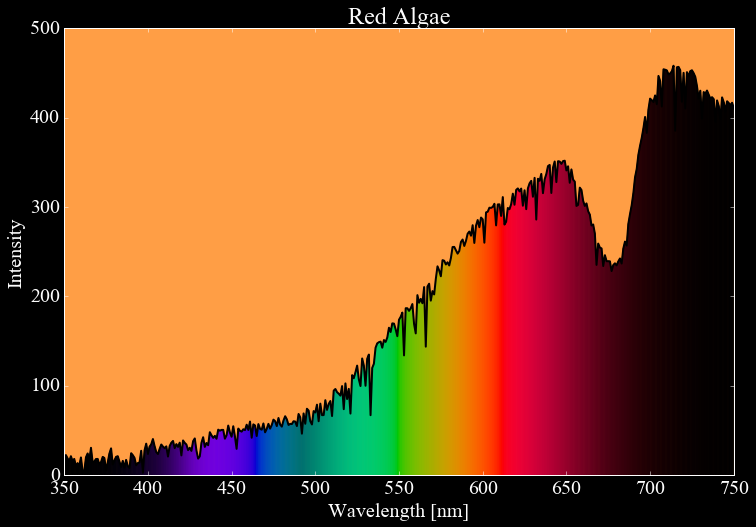

In [145]:
data = np.genfromtxt("spectra/red_algae.alb", skip_header=16)
wl = data[:,0] * 1000.0
A = data[:,1]
plot_spectrum(wl, A, title="Red Algae", stellar_spec="Sun", show_cie=False)

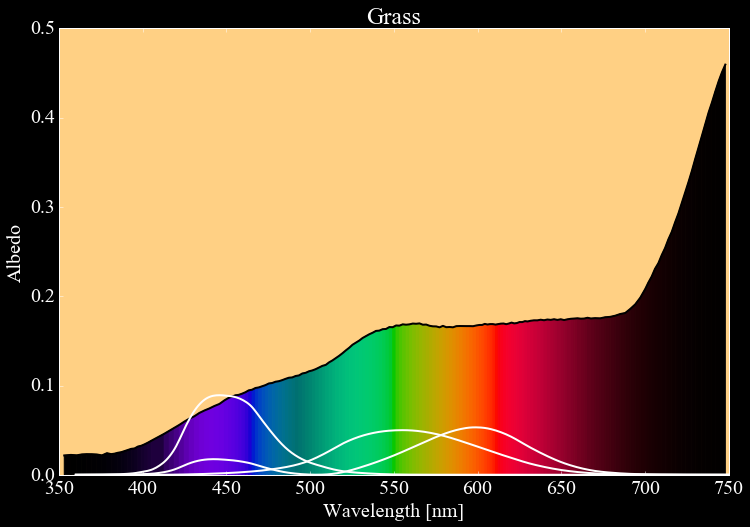

In [244]:
data = np.genfromtxt("spectra/grass.alb", skip_header=26)
wl = data[:,0] * 1000.0
A = data[:,1]
plot_spectrum(wl, A, title="Grass", stellar_spec=None, show_cie=True, ytitle="Albedo")

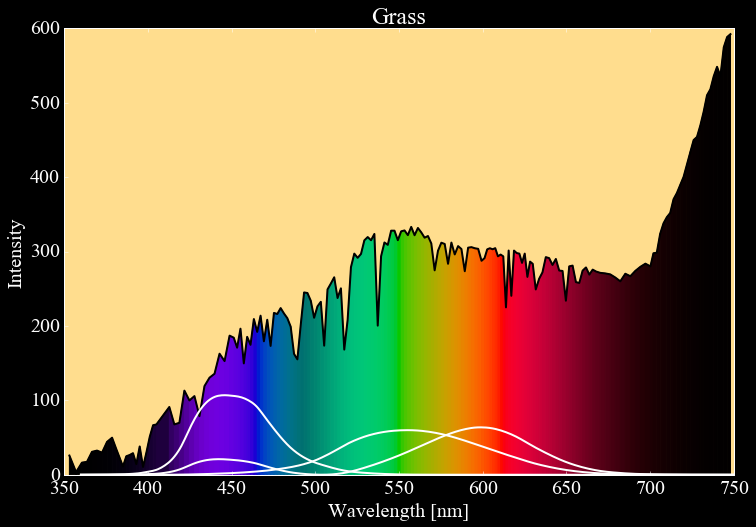

In [255]:
data = np.genfromtxt("spectra/grass.alb", skip_header=26)
wl = data[:,0] * 1000.0
A = data[:,1]
plot_spectrum(wl, A, title="Grass", stellar_spec="Sun", show_cie=True)
dwl = wl[1:] - wl[:-1] 

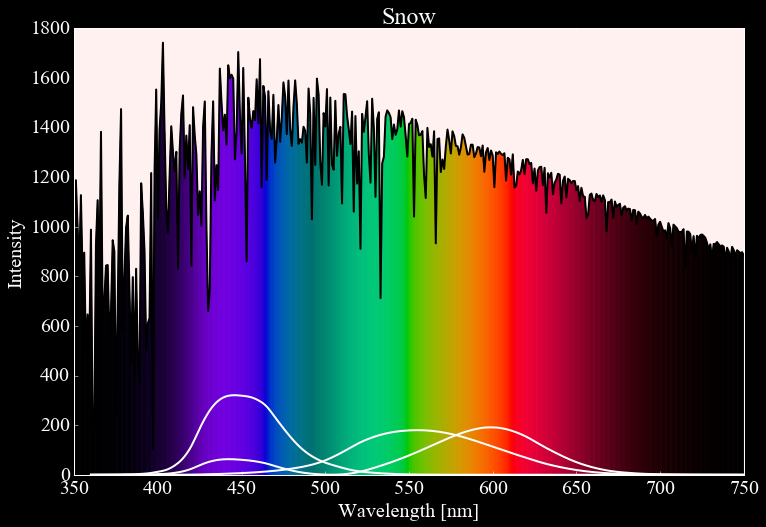

In [148]:
data = np.genfromtxt("spectra/snow.alb", skip_header=26)
wl = data[:,0] * 1000.0
A = data[:,1]
plot_spectrum(wl, A, title="Snow", stellar_spec="Sun", show_cie=True)

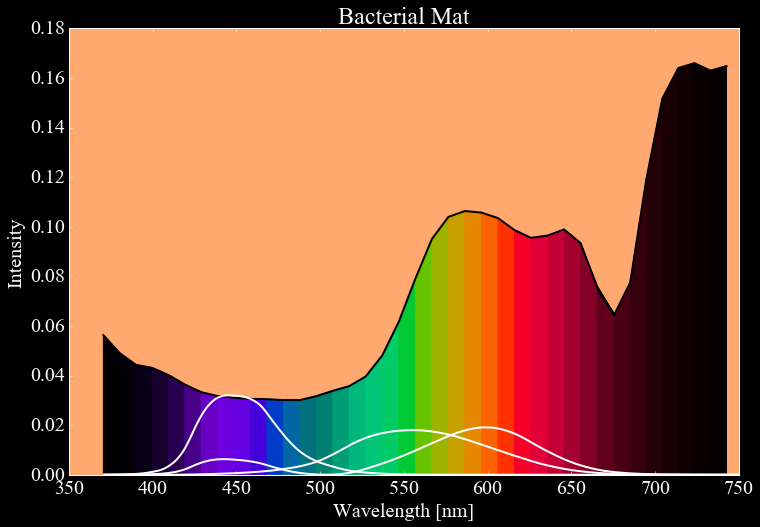

In [158]:
data = np.genfromtxt("spectra/bacterial_mat.alb", skip_header=16)
wl = data[:,0] * 1000.0
A = data[:,1]
plot_spectrum(wl, A, title="Bacterial Mat", stellar_spec=None, show_cie=True)

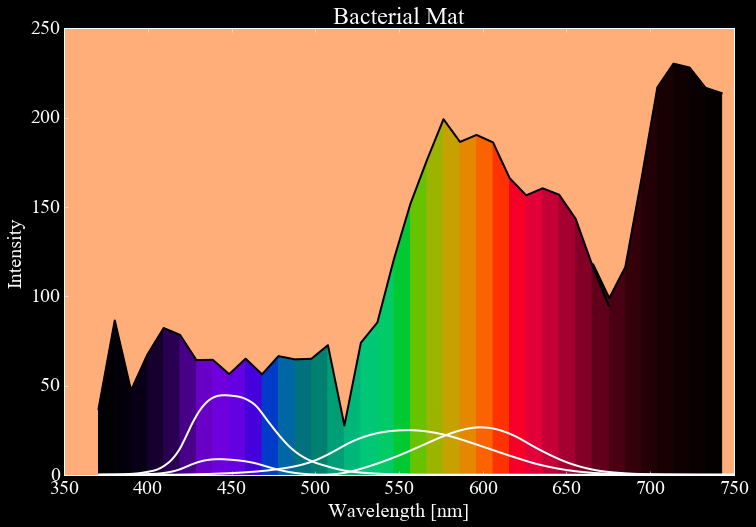

In [159]:
data = np.genfromtxt("spectra/bacterial_mat.alb", skip_header=16)
wl = data[:,0] * 1000.0
A = data[:,1]
plot_spectrum(wl, A, title="Bacterial Mat", stellar_spec="Sun", show_cie=True)

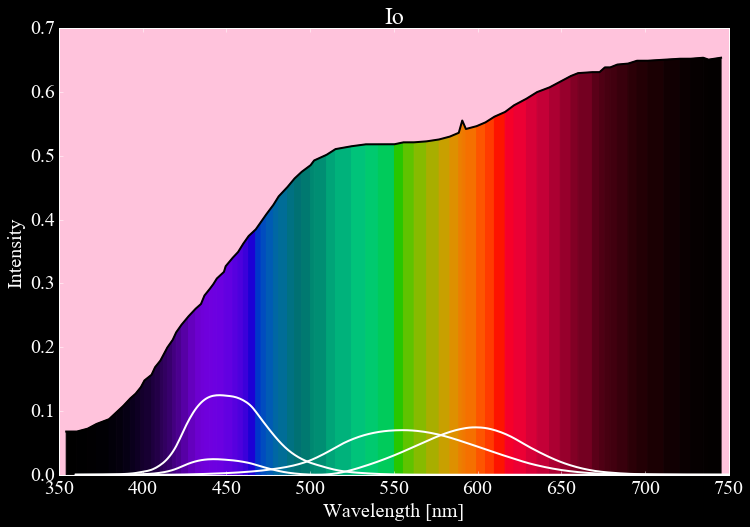

In [286]:
data = np.genfromtxt("spectra/io.alb", skip_header=1)
wl = data[:,0] * 1000.0
A = data[:,1] 
plot_spectrum(wl, A, title="Io", stellar_spec=None, show_cie=True)

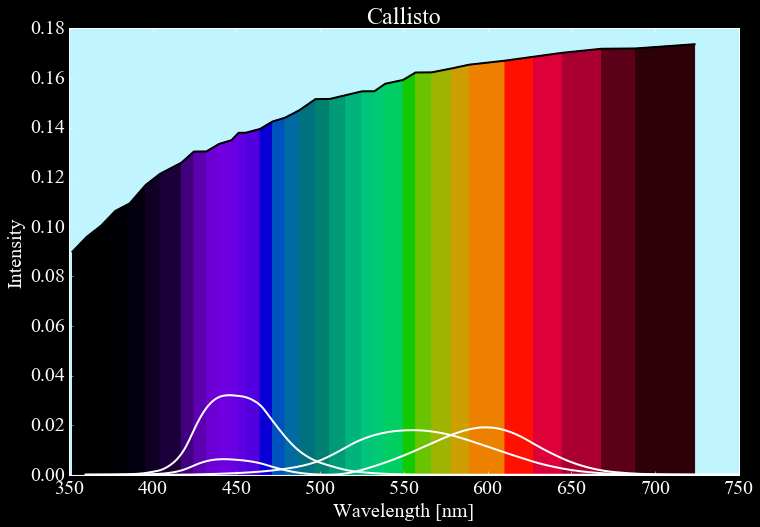

In [164]:
data = np.genfromtxt("spectra/callisto.alb", skip_header=1)
wl = data[:,0] * 1000.0
A = data[:,1]
plot_spectrum(wl, A, title="Callisto", stellar_spec=None, show_cie=True)

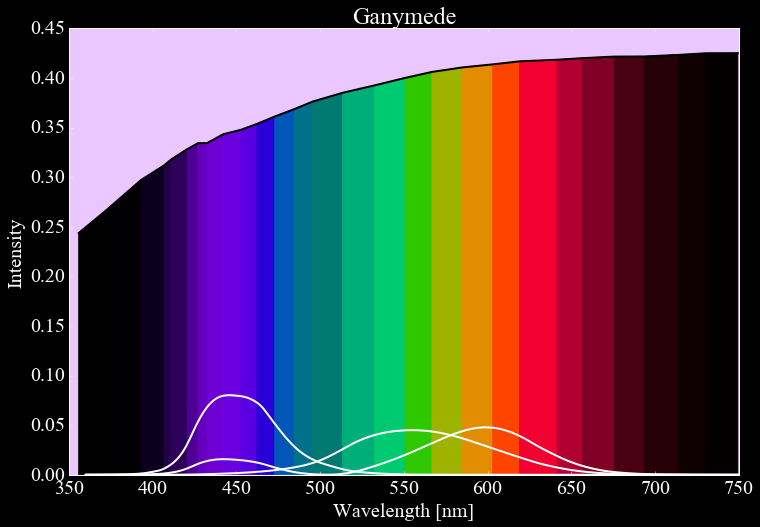

In [165]:
data = np.genfromtxt("spectra/ganymede.alb", skip_header=1)
wl = data[:,0] * 1000.0
A = data[:,1]
plot_spectrum(wl, A, title="Ganymede", stellar_spec=None, show_cie=True)

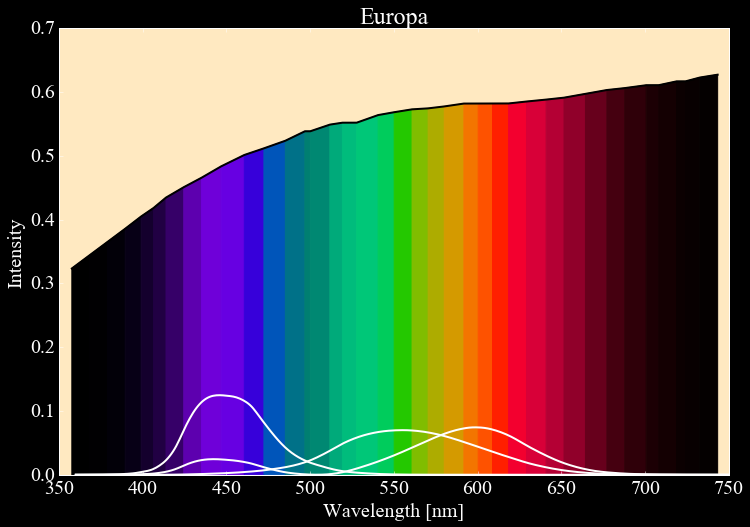

In [167]:
data = np.genfromtxt("spectra/europa.alb", skip_header=1)
wl = data[:,0] * 1000.0
A = data[:,1]
plot_spectrum(wl, A, title="Europa", stellar_spec=None, show_cie=True)

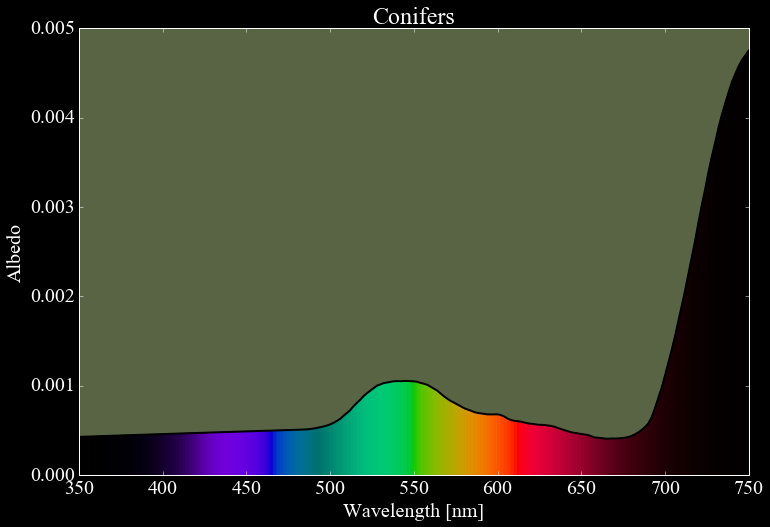

In [296]:
data = np.genfromtxt("spectra/conifers.alb", skip_header=26)
wl = data[:,0] * 1000.0
A = data[:,1] / 100.
plot_spectrum(wl, A, title="Conifers", stellar_spec=None, show_cie=False, ytitle="Albedo")

## Blackbodies

In [174]:
# Define some physical constants in CGS
h = 6.62607e-27       # Planck constant (erg s)
c = 2.998e10          # Speed of light (cm / s)
k = 1.3807e-16        # Boltzmann constant (erg / K)

# Define planck function
def planck(temp, wav):
    return (2. * h * c**2) / (wav**5) / (np.exp(h * c / (wav * k * temp)) - 1.0)

planck = np.vectorize(planck)

In [175]:
wl_nm = np.linspace(350, 750, 1000)
wl_cm = wl_nm / 1e7

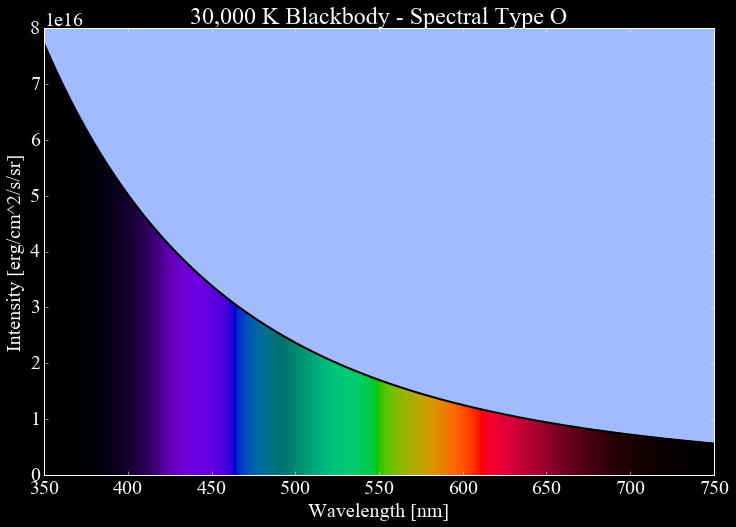

In [195]:
BB = planck(30000., wl_cm)
plot_spectrum(wl_nm, BB, title="30,000 K Blackbody - Spectral Type O", stellar_spec=None, show_cie=False, ytitle=r'Intensity [erg/cm^2/s/sr]')

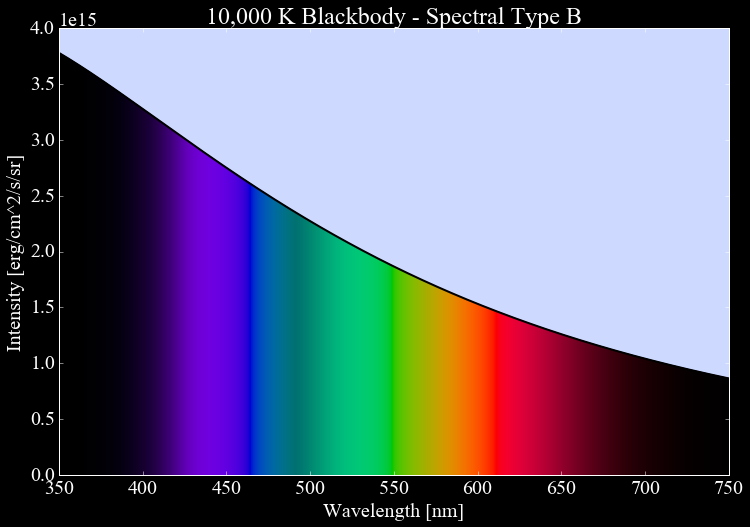

In [198]:
BB = planck(10000., wl_cm)
plot_spectrum(wl_nm, BB, title="10,000 K Blackbody - Spectral Type B", stellar_spec=None, 
              show_cie=False, ytitle=r'Intensity [erg/cm^2/s/sr]')

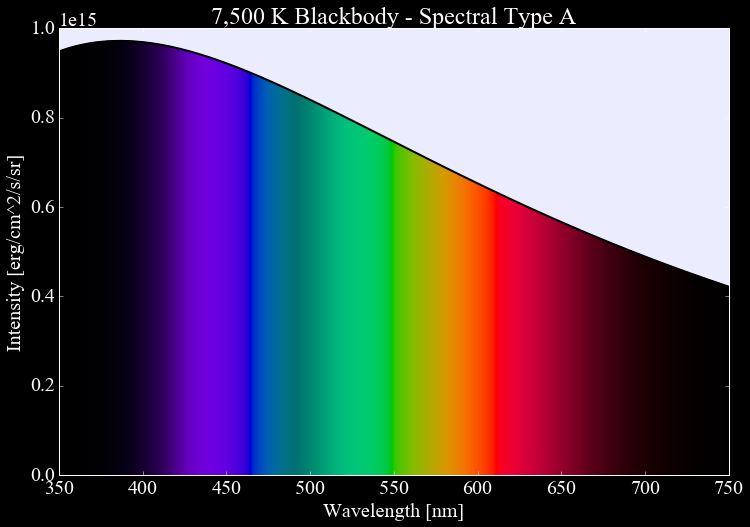

In [200]:
BB = planck(7500., wl_cm)
plot_spectrum(wl_nm, BB, title="7,500 K Blackbody - Spectral Type A", stellar_spec=None, 
              show_cie=False, ytitle=r'Intensity [erg/cm^2/s/sr]')

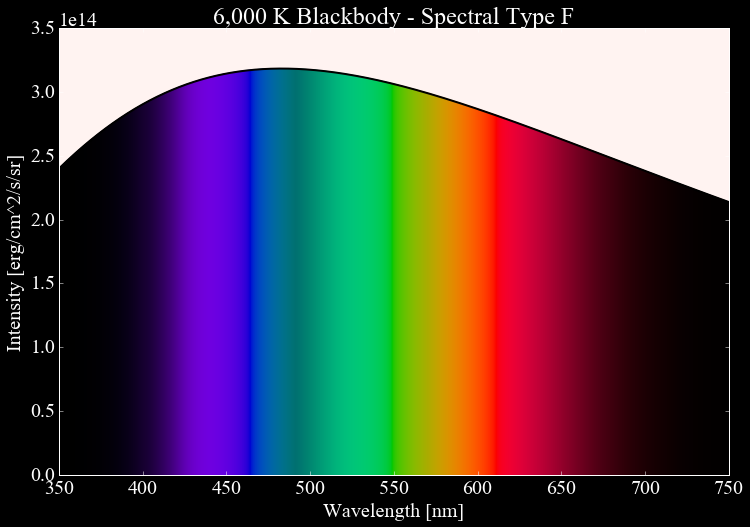

In [201]:
BB = planck(6000., wl_cm)
plot_spectrum(wl_nm, BB, title="6,000 K Blackbody - Spectral Type F", stellar_spec=None, 
              show_cie=False, ytitle=r'Intensity [erg/cm^2/s/sr]')

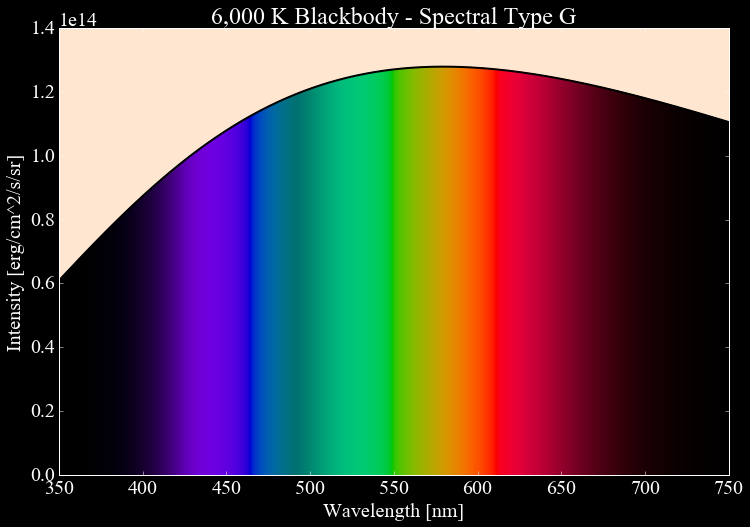

In [202]:
BB = planck(5000., wl_cm)
plot_spectrum(wl_nm, BB, title="6,000 K Blackbody - Spectral Type G", stellar_spec=None, 
              show_cie=False, ytitle=r'Intensity [erg/cm^2/s/sr]')

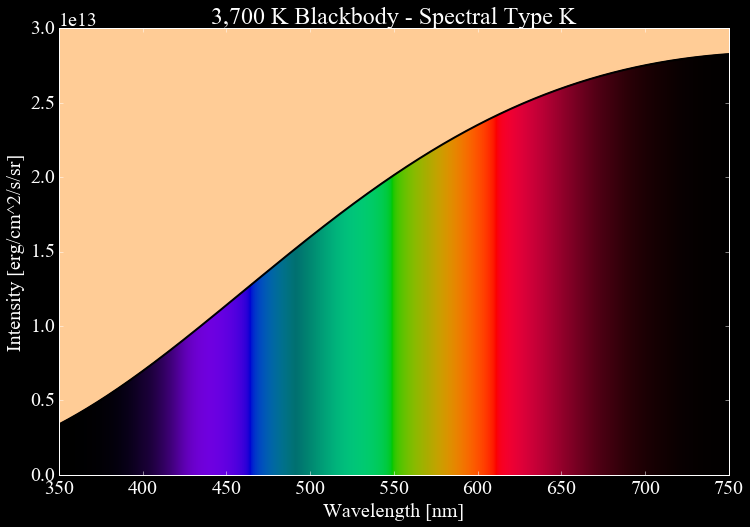

In [203]:
BB = planck(3700., wl_cm)
plot_spectrum(wl_nm, BB, title="3,700 K Blackbody - Spectral Type K", stellar_spec=None, 
              show_cie=False, ytitle=r'Intensity [erg/cm^2/s/sr]')

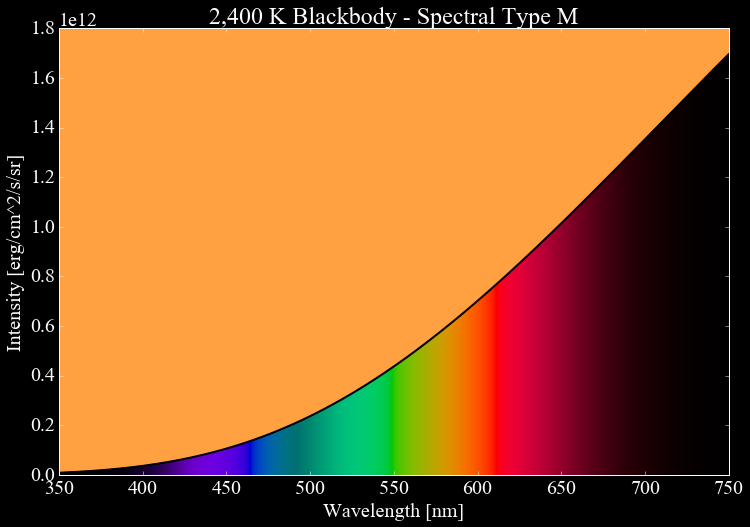

In [204]:
BB = planck(2400., wl_cm)
plot_spectrum(wl_nm, BB, title="2,400 K Blackbody - Spectral Type M", stellar_spec=None, 
              show_cie=False, ytitle=r'Intensity [erg/cm^2/s/sr]')

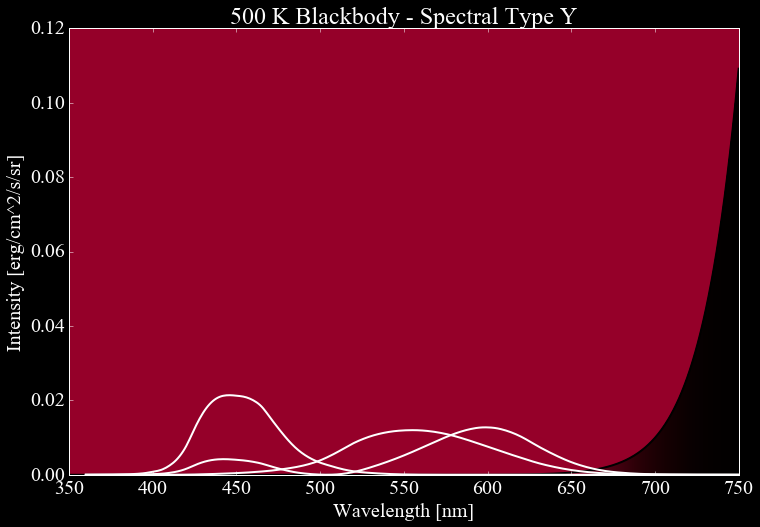

In [298]:
BB = planck(500., wl_cm) / 1.
plot_spectrum(wl_nm, BB, title="500 K Blackbody - Spectral Type Y", stellar_spec=None, 
              show_cie=True, ytitle=r'Intensity [erg/cm^2/s/sr]')

## Stellar Spectra

In [210]:
from astropy.table import Table
from astropy.io import fits as pyfits

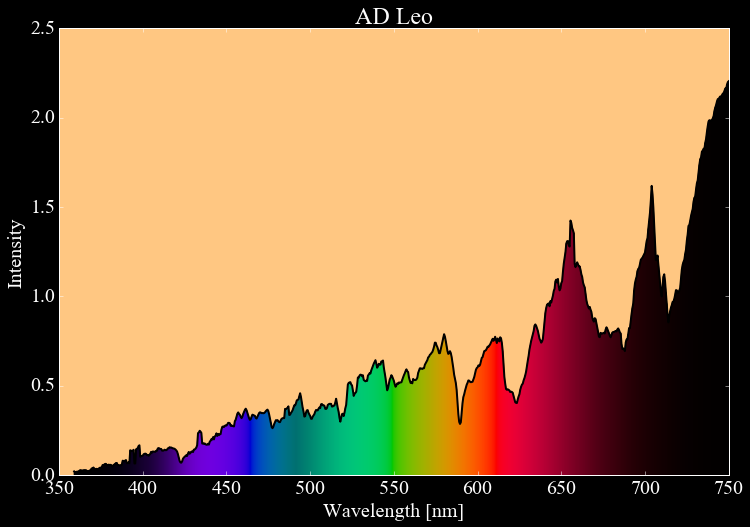

In [232]:
data = np.genfromtxt("spectra/adleo_dat.txt", skip_header=175, skip_footer=1)
wl = data[:,0] * 1000.
I = data[:,1] * 1e15
plot_spectrum(wl, I, title="AD Leo", stellar_spec=None, 
              show_cie=False, ytitle=r'Intensity')

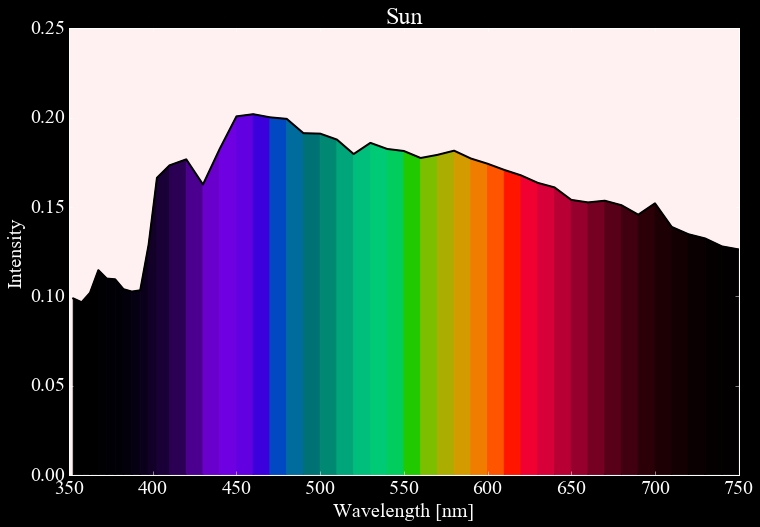

In [234]:
data = np.genfromtxt("spectra/sunum.txt", skip_header=0, skip_footer=0)
wl = data[:,0] * 1000.
I = data[:,1]
plot_spectrum(wl, I, title="Sun", stellar_spec=None, 
              show_cie=False, ytitle=r'Intensity')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in greater_equal
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in less_equal


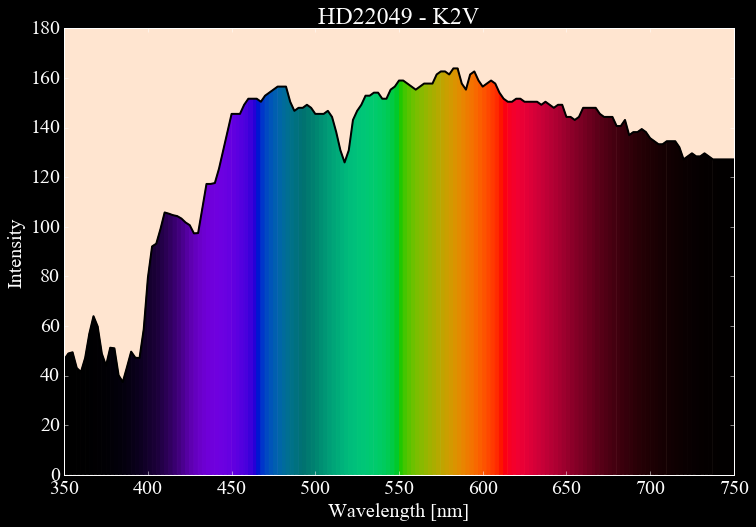

In [235]:
data = np.genfromtxt("spectra/hd22049um.txt", skip_header=0, skip_footer=0)
wl = data[:,0] * .1
I = data[:,1]
plot_spectrum(wl, I, title="HD22049 - K2V", stellar_spec=None, 
              show_cie=False, ytitle=r'Intensity')